<a href="https://colab.research.google.com/github/pavithra-yasiru/fashion-class-classification/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FASHION CLASS CLASSIFICATION

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:  
* 0 => T-shirt/top
* 1 => Trouser
* 2 => Pullover
* 3 => Dress
* 4 => Coat
* 5 => Sandal
* 6 => Shirt
* 7 => Sneaker
* 8 => Bag
* 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.


# STEP #2: IMPORTING DATA

In [ ]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random


In [ ]:
# dataframes creation for both training and testing datasets

train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Practical: 6 Real-World Applications/Module 2: Fashion Class Classification/fashion-mnist_train.csv',
                        sep=',')

test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Practical: 6 Real-World Applications/Module 2: Fashion Class Classification/fashion-mnist_test.csv',
                       sep=',')

In [ ]:
print(train_set.shape)
print(test_set.shape)

(60000, 785)
(10000, 785)


# STEP #3: VISUALIZATION OF THE DATASET  

In [ ]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create training and testing arrays
train_set = np.array(train_set, dtype = 'float32')

test_set = np.array(test_set, dtype='float32')

In [ ]:
print(train_set.shape)
print(test_set.shape)

(60000, 785)
(10000, 785)


In [ ]:
train_set

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

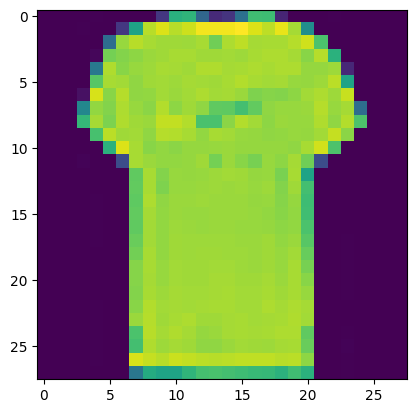

In [ ]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

plt.imshow(train_set[10, 1:].reshape(28, 28))

6.0

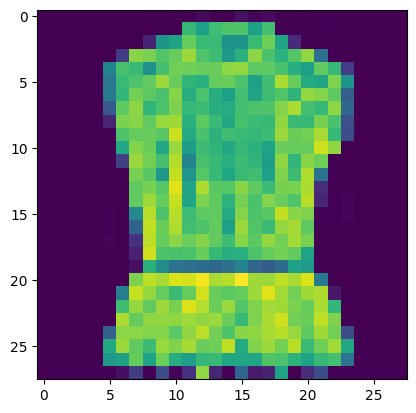

In [ ]:
# view some random images

i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( train_set[i,1:].reshape((28,28)) ) # reshape and plot the image

label = train_set[i,0]

label

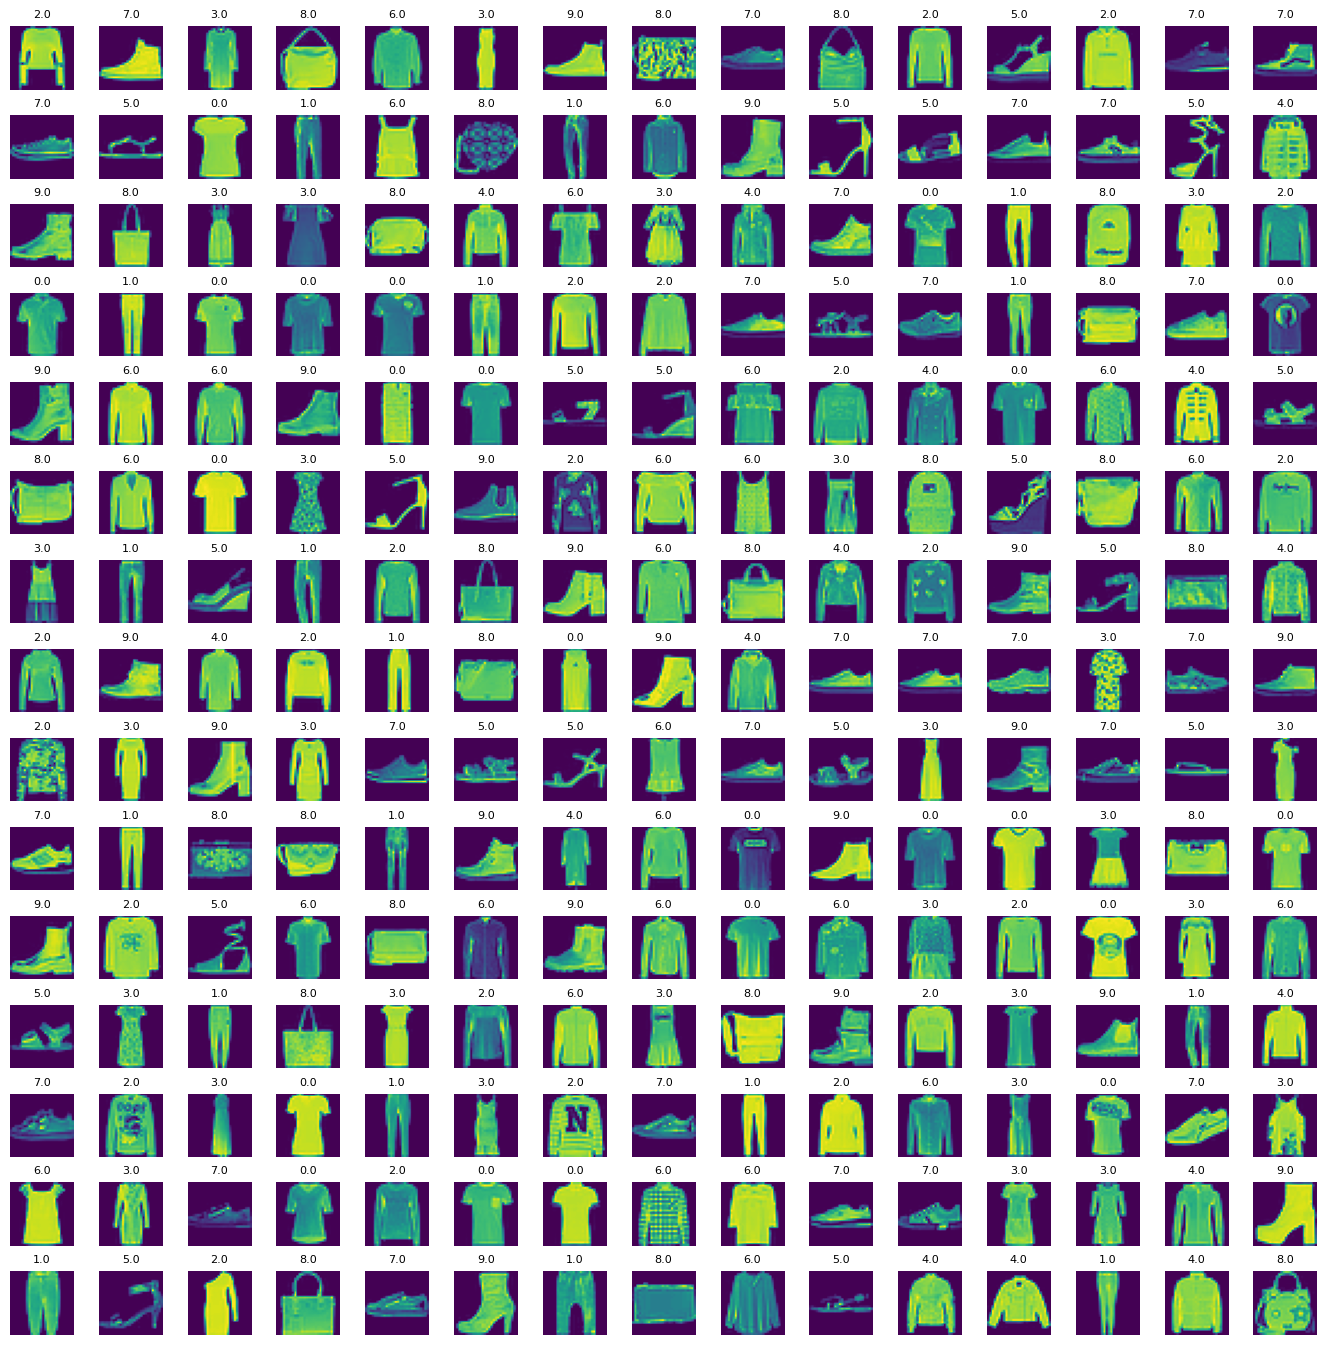

In [ ]:
# view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(train_set) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    axes[i].set_title(train_set[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# STEP #4: TRAINING THE MODEL

In [ ]:
# Prepare the training and testing dataset

x_train = train_set[:, 1:]/255

y_train = train_set[:, 0]

In [ ]:
x_test = test_set[:, 1:]/255

y_test = test_set[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_validate.shape)
print(y_validate.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [ ]:
# * unpack the tuple

x_train = x_train.reshape(x_train.shape[0], * (28, 28, 1))

x_test = x_test.reshape(x_test.shape[0], * (28, 28, 1))

x_validate = x_validate.reshape(x_validate.shape[0], * (28, 28, 1))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [ ]:
# CNN frame

from keras.models import Sequential

cnn = Sequential()

In [ ]:
# CNN Convolutional Layer

from keras.layers import Conv2D

cnn.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# CNN maxpooling Layer

from keras.layers import MaxPooling2D

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# CNN input Layer

from keras.layers import Flatten

cnn.add(Flatten())

In [ ]:
# CNN Hidden Layer

from keras.layers import Dense

cnn.add(Dense(units=64, activation='relu'))

In [ ]:
# CNN Output Layer

cnn.add(Dense(units=10, activation='sigmoid'))

In [ ]:
# Compile the CNN

from tensorflow.keras.optimizers import Adam

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Fit the data to the CNN

cnn.fit(x_train, y_train, batch_size=512, epochs=50, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5282 - loss: 1.5769 - val_accuracy: 0.7502 - val_loss: 0.6865
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7659 - loss: 0.6457 - val_accuracy: 0.7966 - val_loss: 0.5709
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.8005 - loss: 0.5529 - val_accuracy: 0.8092 - val_loss: 0.5275
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8148 - loss: 0.5083 - val_accuracy: 0.8268 - val_loss: 0.4851
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8288 - loss: 0.4763 - val_accuracy: 0.8358 - val_loss: 0.4606
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.8391 - loss: 0.4531 - val_accuracy: 0.8397 - val_loss: 0.4475
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8457 - loss: 0.4335 - val_accuracy: 0.8438 - val_loss: 0.4334
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8504 - loss: 0.4180 - val_accuracy: 0.8508 - v

# STEP #5: EVALUATING THE MODEL

In [ ]:
evaluation = cnn.evaluate(x_test, y_test)

print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8869 - loss: 0.3138
Test Accuracy : 0.886


In [ ]:
# get the predictions for the test data

y_pred = np.argmax(cnn.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


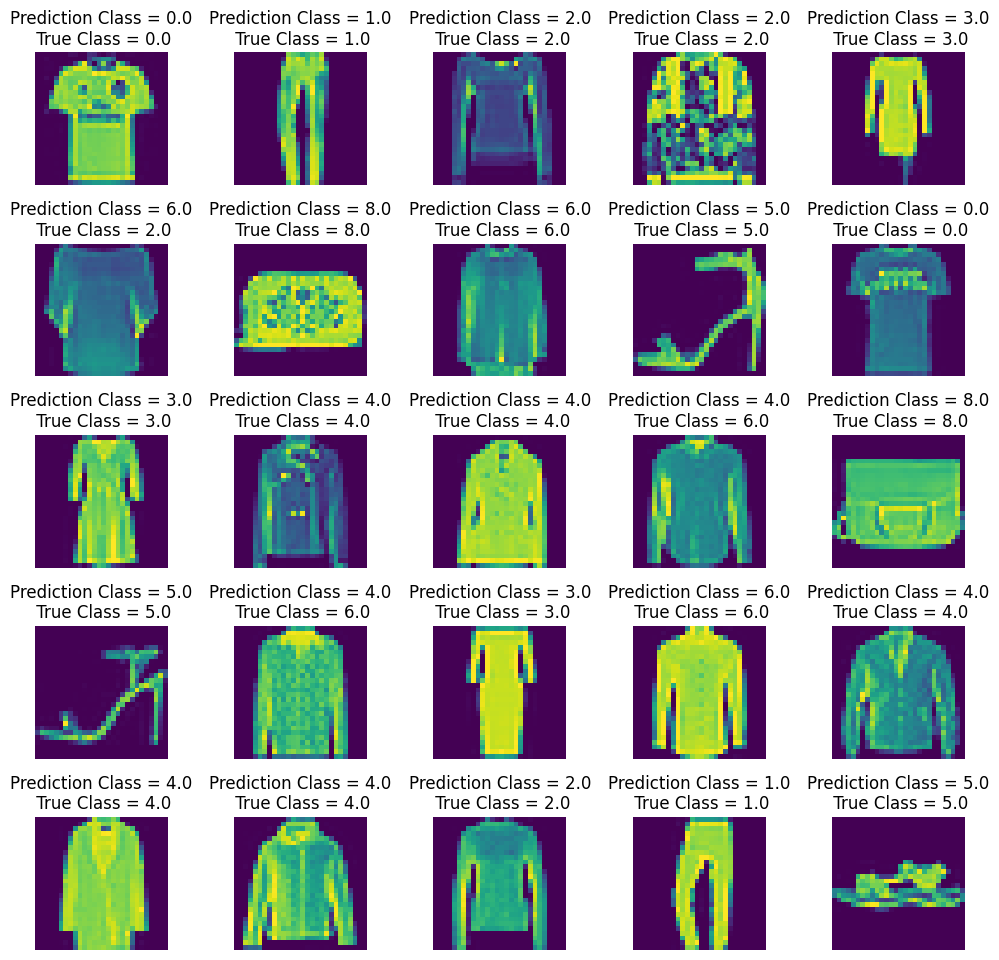

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

print(cm)

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred, target_names = target_names))

[[899   1  20  27   1   0  44   0   8   0]
 [  3 978   2  14   2   1   0   0   0   0]
 [ 18   1 824  12  80   0  61   0   4   0]
 [ 23  12  10 916  19   0  20   0   0   0]
 [  2   1  51  41 824   0  79   0   2   0]
 [  0   1   0   0   0 959   0  26   3  11]
 [192   3  79  44  78   0 591   0  13   0]
 [  0   0   0   0   0  25   0 939   0  36]
 [  7   2   5   1   3   2   6   1 972   1]
 [  0   0   0   0   0   3   0  36   3 958]]
              precision    recall  f1-score   support

     Class 0       0.79      0.90      0.84      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.83      0.82      0.83      1000
     Class 3       0.87      0.92      0.89      1000
     Class 4       0.82      0.82      0.82      1000
     Class 5       0.97      0.96      0.96      1000
     Class 6       0.74      0.59      0.66      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95     

<Axes: >

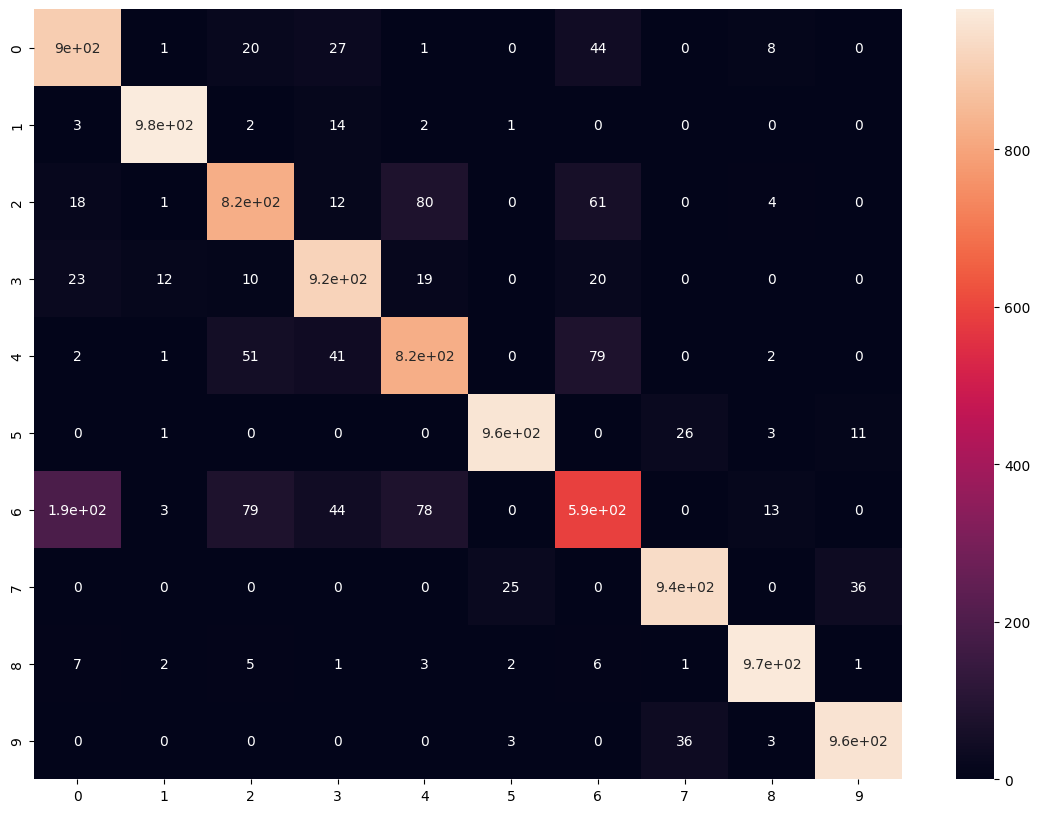

In [ ]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

# Sum the diagonal element to get the total true correct values